# Movie Dataset Recommendation System 

## Business Understanding
### Problem Statement
Permasalahan inti dari projek ini adalah karena banyak film yang dirilis setiap tahun maka pengguna menjadi ragu untuk memilih film yang ingin ditonton. Oleh karena itu, diperlukannya sistem rekomendasi dimana sistem tersebut bisa memberi film yang tepat untuk user. 

### Goal
Tujuan dari projek ini adalah untuk meningkatakan *user experience* saat mencari film yang ingin ditonton.

### Solution
Karena dataset terkait hanya berisi tentang rating atau hasil penilaian pengguna dan genre film, maka solusi yang sangat tepat untuk masalah ini adalah dengan menggunakan *collaborative filtering* dan *content-based filtering*. ***Collaborative Filtering*** merupakan cara untuk memberi rekomendasi bedasarkan penilaian komunitas pengguna atau biasa disebut dengan rating. Sedangkan ***Content-Based Filtering*** merupakan cara untuk memberi rekomendasi bedasarkan genre atau fitur pada item yang disukai oleh pengguna. Contoh dari *content-based filtering* adalah apabila pengguna menyukai film horror maka sistem akan merekomendasi film yang bertema horror pada pengguna.

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/aigamer/movie-lens-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: alvinb
Your Kaggle Key: ··········


100%|██████████| 967k/967k [00:00<00:00, 96.9MB/s]

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [78]:
df_movie = pd.read_csv('/content/movie-lens-dataset/movies.csv')

# Data Understanding

Dataset ini didapat dari [kaggle](https://www.kaggle.com/). Dalam platform tersebut terdapat banyak dataset dari berbagai sumber dan perusahaan yang dapat membantu para pemula mengerti tentang dunia ilmuwan data. Untuk projek ini, saya mengambil data yang bernama [Movie Lens Dataset](https://www.kaggle.com/aigamer/movie-lens-dataset). Berikut adalah keterangan mengenai maksud dari variabel - variabel atau kolom tersebut :

- Ratings.csv
    - userId   : ID pengguna (data type : int 64)
    - movieId   : ID film     (data type : int 64)
    - rating    : Penilaian pengguna terhadap film terkait (data type : float 64)
    - timestamp : kode waktu film  (data type : int 64)
- Movie.csv
    - movieId   : ID film (data type : int 64)
    - title     : judul film bersama tahun rilis (data type : object)
    - genres    : Genre pada film tersebut (data type : object)


In [79]:
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [80]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [81]:
df_rating = pd.read_csv('/content/movie-lens-dataset/ratings.csv')

In [82]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [83]:
df_rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [84]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [85]:
print("number of movies in rating : {}".format(len(df_rating.movieId.unique())))
print("Number of movies in movie list : {}".format(len(df_movie.	movieId.unique())))

number of movies in rating : 9724
Number of movies in movie list : 9742


# Data Understanding

Dalam proses data understanding, saya menggunakan visualisasi data berupa histogram karena saya ingin mengetahui seberapa banyak film yang dipublish dari dataset tersebut.Tentu pertama saya harus memisahkan atau membuat kolom baru untuk mengambil tahun dari kolom *title*.


In [86]:
movie_analysis = df_movie.copy()
movie_analysis['year'] = df_movie['title'].str.extract('(\(\d+\))')
movie_analysis['year'] = movie_analysis['year'].str.extract('(\d+)').astype(float)
movie_analysis

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


In [87]:
movie_analysis.year.describe()

count    9729.000000
mean     1994.254189
std        31.297803
min         6.000000
25%      1988.000000
50%      1999.000000
75%      2008.000000
max      2018.000000
Name: year, dtype: float64

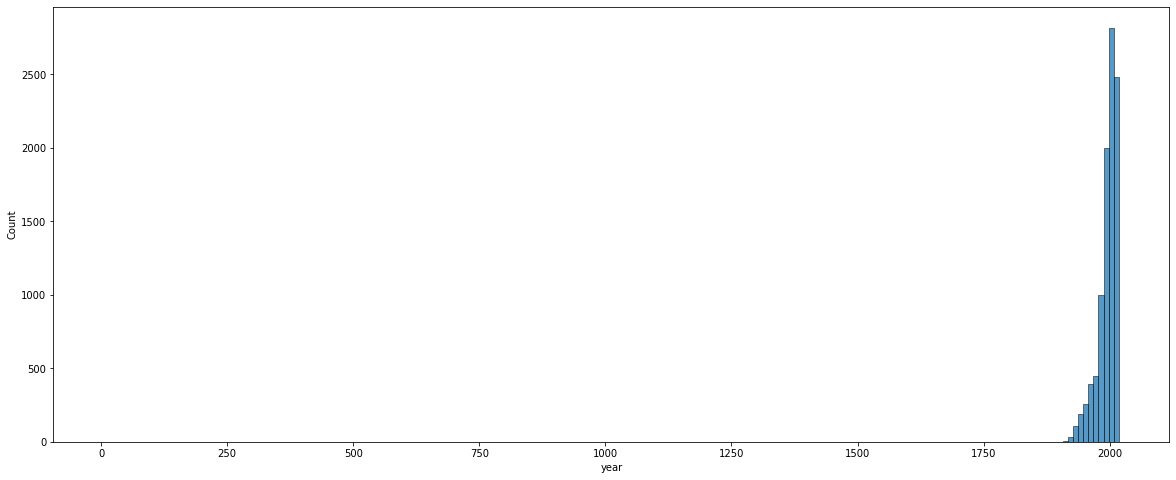

In [88]:
plt.figure(figsize=(20,8))
sns.histplot(data = movie_analysis,x='year',bins = 200)
plt.show()

Dari gambar tersebut, bisa dilihat bahwa tahun 1998 sampai 2005 yang memiliki film rilis terbanyak ketimbang tahun sebelumnya. 

In [89]:
genres=[]
for i in range(len(df_movie.genres)):
    for x in df_movie.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    df_movie[x] = 0
for i in range(len(df_movie.genres)):
    for x in df_movie.genres[i].split('|'):
        df_movie[x][i]=1
df_movie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Selanjutnya saya melihat jumlah genres dalam data tersebut. Saya ingin melihat seberapa banyak genre yang ada dalam dataset ini. Untuk mendapatkan jawaban dari kalimat sebelumnya, saya akan menggunakan visualisasi data yang sama seperti sebelumnya yaitu *bar plot*. 

In [91]:
view = df_movie.iloc[:,3:].sum().reset_index()
view.columns =['title','total'] 

In [92]:
genre = ['Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)']

<function matplotlib.pyplot.plot>

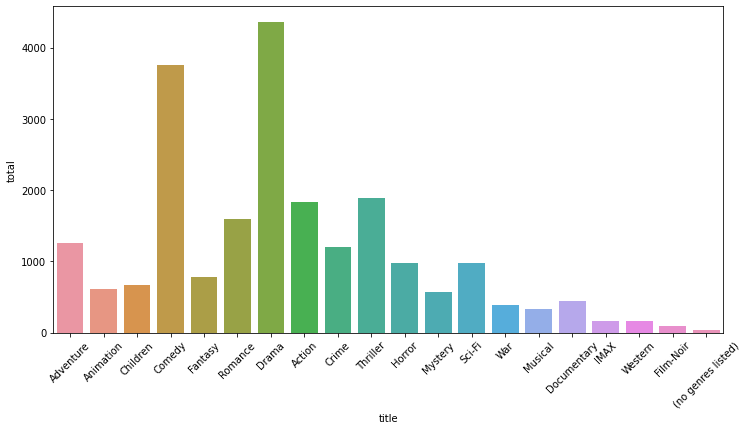

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(x='title',y='total',data=view)
plt.xticks(rotation=45)
plt.plot

Gambar ini menunjukan bahwa genre *drama* adalah genre yang paling banyak jika dibandingkan dengan genre lainnya.

In [94]:
df = df_rating.merge(df_movie,how='inner',on='movieId')

In [95]:
df.head()

,userId,movieId,rating,timestamp,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
df = df.drop(['timestamp','genres','Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'],axis=1)

In [97]:
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


Selain itu, saya juga membuat *count plot* dari *library seaborn* untuk melihat 10 besar film yang sudah dirilis. *Count plot* sendiri adalah sebuah visualisasi data dari *seaborn* yang digunakan untuk menghitung seberapa banyak data dalam suatu label. 

In [98]:
movie_ratings = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'total_rating'})

In [99]:
movie_ratings

,title,total_rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


<function matplotlib.pyplot.plot>

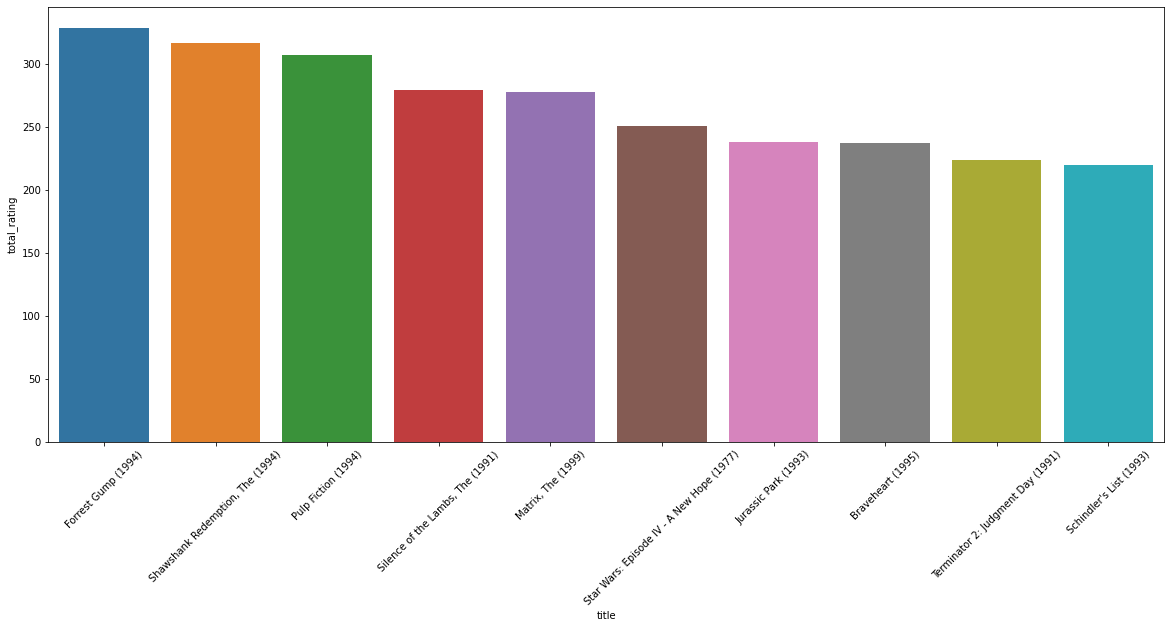

In [100]:
visual_ratings = movie_ratings.sort_values(by ='total_rating',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='title',y='total_rating',data=visual_ratings.iloc[:10,:])
plt.xticks(rotation=45)
plt.plot

Jika kita lihat baik - baik, *Forrest Gump* memiliki tingkat popularitas yang tinggi karena film tersebut memiliki pemberian nilai terbanyak oleh para pengguna.

# Data Preparation

Dalam data preparation, ada beberapa teknik yang saya gunakan untuk proses *preparation*. Selain itu, ada 3 dataset yang saya akan periksa yaitu rating.csv yang dinamakan sebagai df_rating, Movie.csv yand dinamakan sebagai df_movie, dan gabungan kedua dataset yang dinamakan df. Berikut penjelasan beberapa teknik yang akan digunakan untuk *data preparation*dan hasil dari teknik tersebut :

1. Cek data null
    Data null dapat membuat suatu hasil prediksi model menjadi tidak akurat. Cara untuk melihat apakah data ini mengandung null atau tidak adalah dengan menggunakan *method* dari *library* *pandas* yaitu *isnull()*.Tetapi jikalau ada maka kita akan menggunakan kode berikut untuk menghapus data null.
    
    *dataframe.dropna()*
    
     Kode ini berfungsi untuk menghapuskan data yang memiliki null values di dalam row setiap data.
    
3. Cek duplikat data
    Selain data null, duplikat data juga bisa membuat model menjadi tidak akurat. Untuk memastikan apakah data memiliki data duplikat, maka kita akan menggunakan *method* lainnya yang juga berasal dari *pandas* yaitu *duplicated*.
    
4. Data encoding
    Untuk data encoding, dataset yang akan digunakan hanya df atau gabungan dari kedua dataset sebelumnya karena data yang akan digunakan untuk model adalah dataset df ini. Untuk penggunaanya, saya membuat encoding atau menyandikan nilai unik dari kolom user_id. Lalu saya melakukan proses encoding angka ke user_id. Hal yang serupa saya lakukan kepada item_id. Kemudian saya memetakan hasil dari encoding tersebut ke dalam dataframe df.  
    
5. One-Hot Encoding
     Proses ini digunakan untuk *cosine similarity*. Pertama saya membuat one hot encoding pada genre karena setiap film mempunyai jumlah genre yang berbeda dan genre yang bervariasi. Saya membuat kolom baru untuk setiap nilai genre yang terdapat dalam kolom genres.

     Data preparation ini digunakan untuk proses selanjutnya yaitu mengubah data one hot encoding ini menjadi data matrix.
     
     
5. Matrix

    Proses ini digunakan untuk *cosine similarity*. Hal ini dilakukan setelah saya melakukan one hot encoding pada kolom genres.Setelah itu, saya mengubah data yang sudah dimasukan kedalam one-hot encoding menjadi data matrix *compressed sparse row* dengan bantuan *library* *scipy*. 


In [101]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [102]:
df_movie.isnull().sum()

movieId               0
title                 0
genres                0
Adventure             0
Animation             0
Children              0
Comedy                0
Fantasy               0
Romance               0
Drama                 0
Action                0
Crime                 0
Thriller              0
Horror                0
Mystery               0
Sci-Fi                0
War                   0
Musical               0
Documentary           0
IMAX                  0
Western               0
Film-Noir             0
(no genres listed)    0
dtype: int64

In [103]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [104]:
check_duplicates = df_rating[df_rating.duplicated()]
print(check_duplicates)

Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


In [105]:
check_duplicates = df_movie[df_movie.duplicated()]
print(check_duplicates)

Empty DataFrame
Columns: [movieId, title, genres, Adventure, Animation, Children, Comedy, Fantasy, Romance, Drama, Action, Crime, Thriller, Horror, Mystery, Sci-Fi, War, Musical, Documentary, IMAX, Western, Film-Noir, (no genres listed)]
Index: []


In [106]:
check_duplicates = df[df.duplicated()]
print(check_duplicates)

Empty DataFrame
Columns: [userId, movieId, rating, title]
Index: []


# Cosine Similarity

## Data Preparation for Cosine Similarity

In [107]:
df_movie_content = df_movie.drop(['movieId','genres'],axis=1)

In [108]:
df_movie_content = df_movie_content.set_index('title')

In [109]:
from scipy.sparse import csr_matrix
df_content = csr_matrix(df_movie_content.values)
type(df_content)

scipy.sparse.csr.csr_matrix

In [111]:
print(df_content)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (2, 3)	1
  (2, 5)	1
  (3, 3)	1
  (3, 5)	1
  (3, 6)	1
  (4, 3)	1
  (5, 7)	1
  (5, 8)	1
  (5, 9)	1
  (6, 3)	1
  (6, 5)	1
  (7, 0)	1
  (7, 2)	1
  (8, 7)	1
  (9, 0)	1
  (9, 7)	1
  (9, 9)	1
  :	:
  (9731, 0)	1
  (9731, 3)	1
  (9731, 7)	1
  (9731, 12)	1
  (9732, 1)	1
  (9732, 3)	1
  (9732, 7)	1
  (9732, 12)	1
  (9733, 1)	1
  (9733, 6)	1
  (9734, 3)	1
  (9734, 6)	1
  (9735, 1)	1
  (9736, 15)	1
  (9737, 1)	1
  (9737, 3)	1
  (9737, 4)	1
  (9737, 7)	1
  (9738, 1)	1
  (9738, 3)	1
  (9738, 4)	1
  (9739, 6)	1
  (9740, 1)	1
  (9740, 7)	1
  (9741, 3)	1


# Deep Learning

## Data Preparation for Deep Learning

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list user_id: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list user_id:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599

In [ ]:
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding placeID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke placeID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
 

 
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 

df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [ ]:
df

,userId,movieId,rating,title,user,movie
0,1,1,4.0,Toy Story (1995),0,0
1,5,1,4.0,Toy Story (1995),1,0
2,7,1,4.5,Toy Story (1995),2,0
3,15,1,2.5,Toy Story (1995),3,0
4,17,1,4.5,Toy Story (1995),4,0
...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),214,9719
100832,610,160527,4.5,Sympathy for the Underdog (1971),214,9720
100833,610,160836,3.0,Hazard (2005),214,9721
100834,610,163937,3.5,Blair Witch (2016),214,9722


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


In [ ]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,title,user,movie
67037,551,34162,4.0,Wedding Crashers (2005),341,1891
42175,232,59421,2.0,What Happens in Vegas... (2008),83,907
93850,288,8880,4.0,Mask (1985),106,5749
6187,414,1080,5.0,Monty Python's Life of Brian (1979),146,61
12229,577,2406,4.0,Romancing the Stone (1984),267,154
...,...,...,...,...,...,...
6265,249,1089,4.0,Reservoir Dogs (1992),89,62
54886,75,44199,3.0,Inside Man (2006),281,1251
76820,132,3186,4.5,"Girl, Interrupted (1999)",43,2598
860,17,110,4.5,Braveheart (1995),4,7


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Modeling and Result

Untuk tahap modeling, saya menggunakan *neural network* dan *Cosine Simirality* untuk sistem rekomendasi berbasis *collaborative filtering* dan *content-based filtering*. Untuk model deep learning, saya gunakan untuk sistem rekomendasi berbasis *collaborative filtering* dimana model ini akan menghasilkan rekomendasi untuk satu pengguna.

Untuk sistem rekomendasi berbasis *content-based filtering*, saya menggunakan *cosine similarity* yang akan menghitung kemiripan antara satu film dengan lainnya bedasarkan fitur yang terdapat pada satu film.Hasil dari model ini adalah pemberian 50 film rekomendasi bedasarkan genre.

Untuk model ini, saya sengaja memberi 50 rekomendasi film karena saya ingin menunjukan bahwa hasil dari model ini akan memberikan rekomendasi film dengan genre yang serupa dengan film yang direkomendasikan.

    
Untuk merangkum semua penjelasan, kedua model ini bisa digunakan untuk sistem rekomendasi berbasis *collaborative filtering* dan *content-based filtering*.

##Modelling for Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(df_content) 
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_movie['title'], columns=df_movie['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9742, 9742)


title,Open Water 2: Adrift (2006),David Cross: Making America Great Again (2016),"Circus, The (1928)",Premium Rush (2012),Japanese Story (2003)
title,,,,,
Gentlemen of Fortune (Dzhentlmeny udachi) (1972),0.353553,0.500000,0.500000,0.000000,0.500000
Retroactive (1997),0.500000,0.000000,0.000000,0.500000,0.000000
"Mummy: Tomb of the Dragon Emperor, The (2008)",0.353553,0.000000,0.000000,0.707107,0.000000
"American Carol, An (2008)",0.000000,0.707107,0.707107,0.000000,0.000000
Thelma & Louise (1991),0.408248,0.000000,0.000000,0.000000,0.577350
Aileen: Life and Death of a Serial Killer (2003),0.000000,0.000000,0.000000,0.000000,0.000000
Live Flesh (Carne trémula) (1997),0.500000,0.000000,0.000000,0.000000,0.707107
"Illusionist, The (L'illusionniste) (2010)",0.000000,0.000000,0.000000,0.000000,0.000000
Thesis (Tesis) (1996),0.816497,0.000000,0.000000,0.408248,0.577350


## Model Prediction for Cosine Similarity

In [ ]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=df_movie[['title', 'genres','Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)']], k=50):
    
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
movie = resto_recommendations('Retroactive (1997)')

In [ ]:
movie

,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,Futureworld (1976),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,"Island of Dr. Moreau, The (1996)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,"Timecrimes (Cronocrímenes, Los) (2007)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,Push (2009),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Seven Sisters (2017),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5,Paradox (2010),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,"Atomic Submarine, The (1959)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
7,2048: Nowhere to Run (2017),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8,Autómata (Automata) (2014),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9,Saturn 3 (1980),Adventure|Sci-Fi|Thriller,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


## Model Training for Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import  EarlyStopping
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    # metrics=[[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]]
    metrics=[[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()]]
)
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
10084/10084 [==============================] - 69s 7ms/step - loss: 0.6264 - mean_absolute_error: 0.1760 - root_mean_squared_error: 0.2220 - val_loss: 0.6103 - val_mean_absolute_error: 0.1600 - val_root_mean_squared_error: 0.2053
Epoch 2/100
10084/10084 [==============================] - 66s 7ms/step - loss: 0.6047 - mean_absolute_error: 0.1542 - root_mean_squared_error: 0.1986 - val_loss: 0.6064 - val_mean_absolute_error: 0.1563 - val_root_mean_squared_error: 0.2010
Epoch 3/100
10084/10084 [==============================] - 67s 7ms/step - loss: 0.6006 - mean_absolute_error: 0.1501 - root_mean_squared_error: 0.1938 - val_loss: 0.6051 - val_mean_absolute_error: 0.1548 - val_root_mean_squared_error: 0.1995
Epoch 4/100
10084/10084 [==============================] - 67s 7ms/step - loss: 0.5977 - mean_absolute_error: 0.1471 - root_mean_squared_error: 0.1904 - val_loss: 0.6047 - val_mean_absolute_error: 0.1537 - val_root_mean_squared_error: 0.1989
Epoch 5/100
10084/10084 [=======

## Model Prediction for Deep Learning

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_ID))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title)

Showing recommendations for users: 226
movie with high ratings from user
--------------------------------
Willy Wonka & the Chocolate Factory (1971)
Office Space (1999)
Wayne's World (1992)
Endless Summer, The (1966)
Bill & Ted's Excellent Adventure (1989)
--------------------------------
Top 10 movie recommendation
--------------------------------
Silence of the Lambs, The (1991)
Godfather, The (1972)
Streetcar Named Desire, A (1951)
Apocalypse Now (1979)
Grand Day Out with Wallace and Gromit, A (1989)
Harold and Maude (1971)
Miller's Crossing (1990)
Unforgiven (1992)
Nights of Cabiria (Notti di Cabiria, Le) (1957)
Celebration, The (Festen) (1998)


# Evaluation 

Pada evaluation saya menggunakan tiga teknik yaitu *mean absolute error* , *root mean squared error*, dan metrik buatan saya yaitu *accurate*. bedasarkan [sumber](https://towardsdatascience.com/recommendation-systems-models-and-evaluation-84944a84fb8e) terkait, kedua metrik ini berhubungan dengan rating pengguna. Berikut adalah penjelasan terkait ketiga metrik ini :

- ***Mean Absolute Error*** : metrik ini digunakan untuk mengetahui kesalahan model atau memberitahu seberapa error model yang sudah di latih kepada data yang akan dites. berikut adalah rumus dari metrik tersebut.
        
    ![image](https://user-images.githubusercontent.com/82896196/135978354-10610b16-1ffd-4b38-aebc-04a8511baf0b.png)
    
    Dari sini, semakin rendahnya nilai MAE (*mean absolute error*) maka semakin baik dan akurat model yang dibuat.

- ***Root Mean Square Error*** : metrik ini juga menghitung seberapa error yang terdapat dari model. Semakin rendahnya nilai *root mean square error* semakin baik model tersebut dalam melakukan prediksi. dibawah ini adalah gambar dari formula *root mean square error*.

    ![image](https://user-images.githubusercontent.com/82896196/135995423-74268008-5509-4f61-8d16-df0372eb827e.png)
    
- ***accurate*** : untuk metrik ini, saya menghitung dengan total prediksi rekomendasi bedasarkan genre yang benar dibagi dengan total rekomendasi yang telah diberikan. Saya menggunakan metrik ini karena saya ingin mengetahui apakah model yang dipakai untuk *content-based learning* dapat memprediksi semua konten bedasarkan genre dengan benar. 
    
    
 Penggunaan kedua metrik tersebut bisa didapat dari model deep learning yang didapat saat melakukan model fitting pada data.  Dari hasil model tersebut, *mean absolute error* model ini adalah sebesar 0.1391 pada training dan 0.1516 pada test, sedangkan untuk *root mean squared error* model ini adalah 0.1815 pada tranining dan 0.1986 pada test. Hal ini menunjukan bahwa model ini memiliki error dibawah 20% jika menggunakan *mean absolute error* dan dibawah 20% jika menggunakan *root mean squared error*. Meskipun memiliki error sebesar kalimat sebelumnya, model ini masih bisa digunakan untuk sistem rekomendasi.
 
 Selain itu, untuk metrik *accurate* digunakan untuk mengevaluasi *cosine similarity*. Dari evaluasi ini, kita mendapatkan bahwa *cosine similarity* berfungsi dengan sempurna untuk merekomendasikan film karena hasil dari pengambilan sample secara acak menghasilkan akurasi 100% yang artinya tidak ada kesalahan dalam menggunakan *cosine similarity*
 

## Model Evaluation for Deep Learning

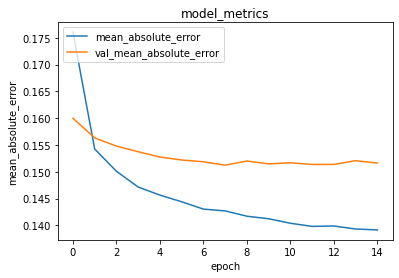

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'], loc='upper left')
plt.show()

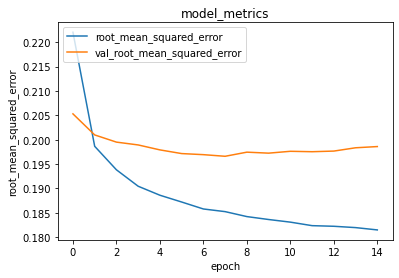

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'], loc='upper left')
plt.show()

In [ ]:
movie_df = df_movie

 
# Mengambil sample user
user_ID = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_ID]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['movieId'].isin(movie_visited_by_user.movieId.values)]['movieId'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_ID)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

# Model Evaluation for Cosine Similarity

In [ ]:
retro = df_movie[df_movie['title'] == 'Retroactive (1997)']
get_genre = [i for i in genre if retro[i].values == 1]
df_movie[df_movie['title'] == 'Retroactive (1997)']["Sci-Fi"].values[0]


1

In [ ]:
def accurate (name ):
  retro = df_movie[df_movie['title'] == name]
  get_genre = [i for i in genre if retro[i].values == 1]
  sum = float(0)
  for j in get_genre :
    print("The accuracy of "+ j+" : " + str((movie[j].sum()/len(movie[j]))*100) + "%")


In [ ]:
accurate('Retroactive (1997)')

The accuracy of Thriller : 100.0%
The accuracy of Sci-Fi : 100.0%
